# Análise Exploratória de Dados - Telco Customer Churn

## Objetivo do Projeto
Identificar clientes com alto risco de churn (cancelamento) em uma empresa de telecomunicações, utilizando técnicas de análise exploratória de dados para entender os principais fatores que influenciam o cancelamento.

## Sobre o Dataset
- **Fonte:** Kaggle - Telco Customer Churn Dataset
- **Registros:** 7.043 clientes
- **Variáveis:** 21 features (demográficas, serviços contratados, informações de conta)
- **Target:** Churn (Yes/No)
- **Taxa de Churn:** 26.5%

## Principais Questões de Negócio
1. Qual o perfil dos clientes que fazem churn?
2. Quais fatores (tenure, contrato, pagamento, serviços) mais influenciam o cancelamento?
3. Qual o impacto financeiro do churn atual?
4. Como a empresa pode reduzir a taxa de churn?

---

## 1. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

---

## 2. Visão Geral do Dataset

In [2]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---

## 3. Análise da Variável Target (Churn)

### 3.1 Distribuição de Churn

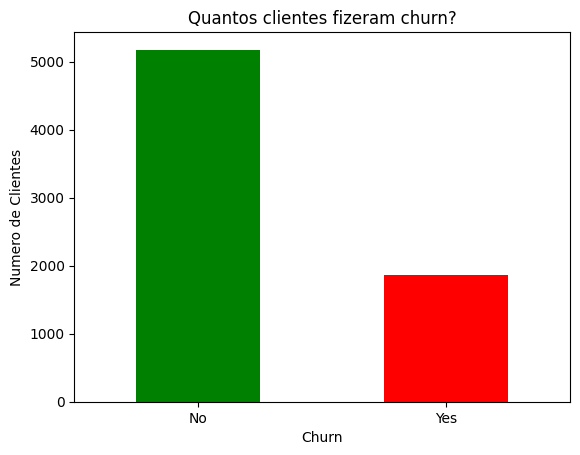

In [6]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Quantos clientes fizeram churn?')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) 
plt.show()

### 3.2 Interpretação

**Distribuição:**
- 73% dos clientes permanecem (Não)
- 27% fazem churn (Sim)

**Análise:**
- Dataset levemente desbalanceado
- Taxa de churn de 27% é significativa para o negócio
- Representa aproximadamente 1 em cada 4 clientes

---

## 4. Análise de Variáveis Numéricas

### 4.1 Identificação e Distribuição

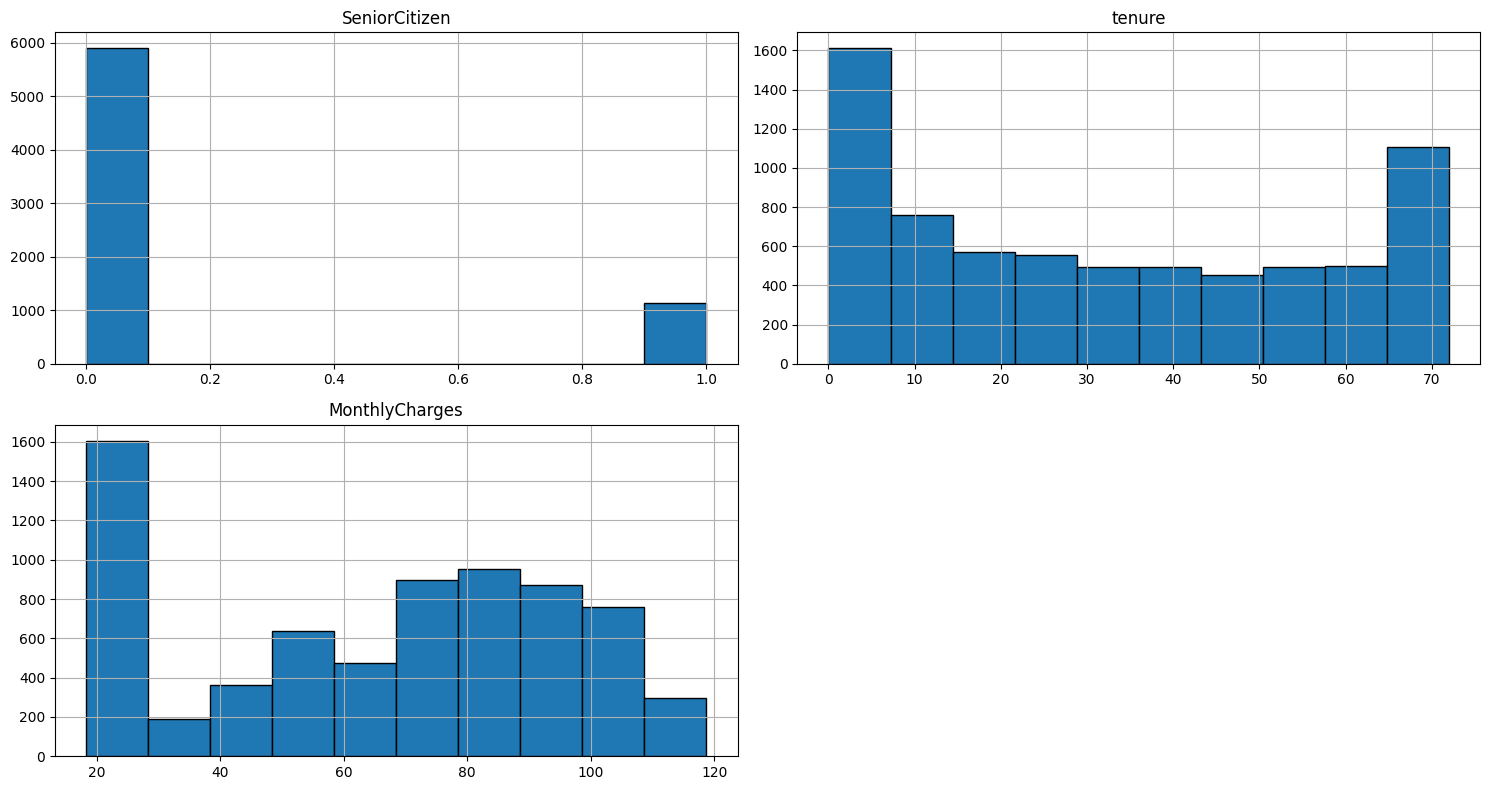

In [7]:
# Identifica colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualiza distribuição
df[numeric_cols].hist(bins=10, figsize=(15, 8), edgecolor='black')
plt.tight_layout()
plt.show()

### 4.2 Observações das Distribuições

- Temos um distribuiçao bimodal, com um pico no inicio e outro no final
- Clientes novos predominam.
- Distribuicao  Assimétrica à direita em MonthlyCharges, Clientes com a cobranca mensal media de 20 predominam.

### 4.3 Relação entre Variáveis Numéricas e Churn

#### Tenure vs Churn

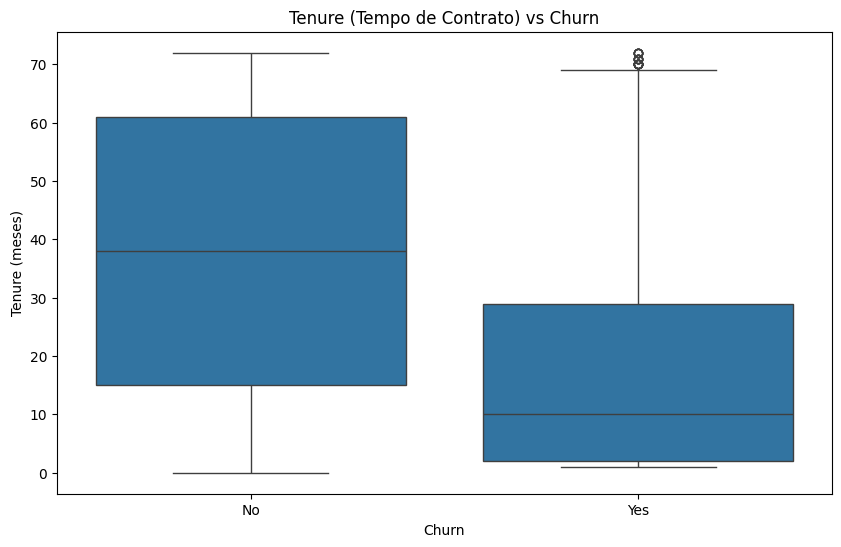

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure (Tempo de Contrato) vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')
plt.show()

#### MonthlyCharges vs Churn

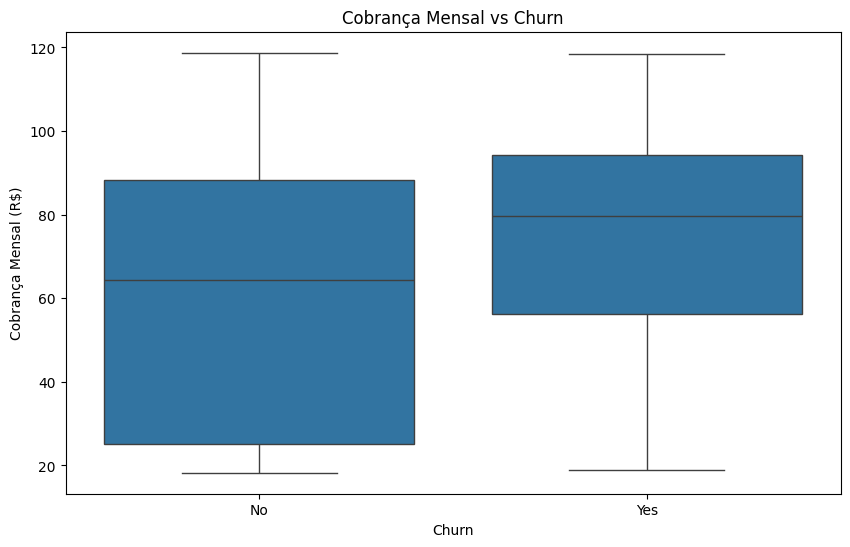

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cobrança Mensal vs Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal (R$)')
plt.show()

### 4.4 Interpretação das Variáveis Numéricas

**Colunas numéricas encontradas:**
SeniorCitizen, tenure, MonthlyCharges

**Distribuição de Tenure:**
Temos um distribuiçao bimodal, com um pico no inicio para clientes novos (0-10 meses) e muitos clientes antigos (60-72 meses). Poucos clientes na faixa média.

**Tenure vs Churn:**
Grande parte dos clientes que saem tem o tenure menor, o que indica que clientes novos tendem mais a ser churns

**MonthlyCharges vs Churn:**
Clientes que saem pagam um valor relativamente alto. Isso acontece, pois, como são novos, ainda não conheceram de fato o serviç um valor alto.

**Insights:**
1. Clientes novos (tenure < 12 meses) são o grupo de maior risco
2. Cobrar alto de clientes novos aumenta significativamente o churn
3. AÇÃO: Empresa deveria oferecer preços promocionais nos
   primeiros meses para reter novos clientes até eles perceberem valor

---

## 5. Recomendações Estratégicas para Retenção

### 5.1 Período Promocional para Novos Clientes

- Descontos nos primeiros 3-6 meses
  
Aumenta a chance de passarem da fase de teste(Fase critica de perdas)


### 5.2 Onboarding Reforçado

- Educar o cliente sobre os benefícios

Mostrar valor logo no início do servico


### 5.3 Monitoramento de Clientes em Risco

- Alerta para tenure < 6 meses + MonthlyCharges alto

Ação proativa como ligar, oferecer suporte, desconto (Atençao redobrada nesses clientes)

---

## 6. Análise de Coortes por Tenure

### 6.1 Hipóteses sobre Distribuição Bimodal

**Hipóteses levantadas:**
- **Muitos clientes novos (0-12 meses):** Alguma campanha de marketing recente
- **Muitos clientes antigos (60-72 meses):** Serviço realmente tem qualidade
- **Poucos no meio (12-24 meses):** Serviço sem promoção inicial, sem incentivo para se manter, empresa não cria vínculo inicialmente

### 6.2 Teste de Hipóteses - Taxa de Churn por Período

/var/folders/wm/rt8t_wn575169b8q43c5mrg00000gn/T/ipykernel_2516/2776356128.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


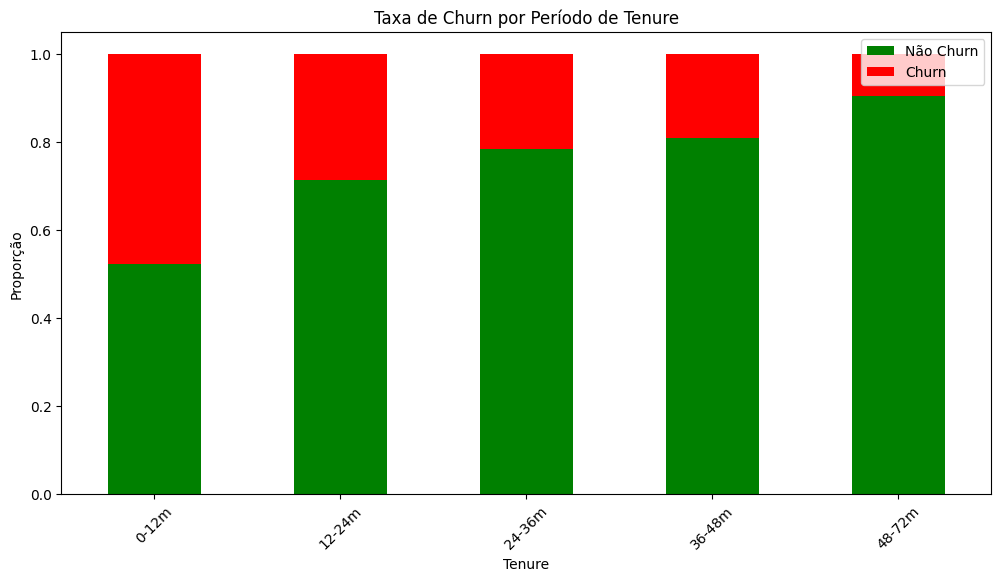

In [13]:
# Cria grupos de tenure
df['tenure_group'] = pd.cut(df['tenure'], 
                             bins=[0, 12, 24, 36, 48, 72], 
                             labels=['0-12m', '12-24m', '24-36m', '36-48m', '48-72m'])

# Calcula taxa de churn por grupo
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()

# Visualização
churn_by_tenure.plot(kind='bar', stacked=True, figsize=(12, 6), 
                     color=['green', 'red'])
plt.title('Taxa de Churn por Período de Tenure')
plt.xlabel('Tenure')
plt.ylabel('Proporção')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=45)
plt.show()

### 6.3 Programa de Retenção Proposto

Baseado na análise de coortes, propomos ações segmentadas:

#### Para clientes 0-6 meses (tenure baixo):
**Ação:** Oferta exclusiva válida apenas para a primeira assinatura - 20% off ao assinar por 6 meses

**Justificativa:** Reduz a barreira inicial de preço e cria compromisso de médio prazo

#### Para clientes 6-12 meses (ainda em risco):
**Ação:** Desconto progressivo por tempo de casa - 5% a cada 6 meses
- A partir de 6 meses: 5%
- Com 12 meses: 10%
- Limitado a 20%

**Justificativa:** Incentiva renovação contínua e cria sensação de recompensa pela fidelidade

#### Para clientes 12+ meses (começando a fidelizar):
**Ação:** Programa de indicação para clientes fiéis - a cada 3 indicados que assinarem por pelo menos 1 mês, você ganha 1 mês gratuito

**Justificativa:** Transforma clientes fiéis em vendedores da marca e reforça vínculo emocional

---

## 7. Análise de Variáveis Categóricas

### 7.1 Identificação de Variáveis Categóricas

In [ ]:
# Identifica variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')

### 7.2 Tipo de Contrato vs Churn

#### Distribuição dos Tipos de Contrato

In [ ]:
contract_counts = df['Contract'].value_counts()

contract_counts.plot(kind='bar', color='blue')
plt.title('Distribuição dos Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Numero de Clientes')
plt.xticks(rotation=45)
plt.show()

#### Taxa de Churn por Tipo de Contrato

In [ ]:
# Tabela cruzada: Contract vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', figsize=(10, 6),
                    color=['green', 'red'], edgecolor='black')
plt.title('Churn por contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Percentual')
plt.legend(['Não Churn', 'Churn'])
plt.show()

### 7.3 Método de Pagamento vs Churn

In [ ]:
# Tabela cruzada: PaymentMethod vs Churn
paymant_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

paymant_churn.plot(kind='bar', color=['green', 'red'],
                   figsize=(10, 6), edgecolor='black')
plt.title('Churn por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Percentual')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.4 Análise de Variáveis Categóricas

#### Contract vs Churn

**Tipo com maior churn:** Contrato Mês a Mês (57% de taxa de churn)

**Tipo com menor churn:** Contrato de 2 anos

**Interpretação:**
- Contratos mês a mês servem apenas para suprir curiosidade inicial
- Não permitem ao cliente conhecer totalmente o serviço
- Falta de compromisso de longo prazo aumenta propensão ao cancelamento

**Ação de negócio:**
- Ações de marketing e onboarding reforçado (tutorial, suporte prioritário)
- Aumentar percepção de valor para influenciar cliente a iniciar com contrato de maior duração
- Incentivos para migração de Month-to-month para contratos anuais/bianuais

#### PaymentMethod vs Churn

**Método com maior churn:** Cheque eletrônico

**Interpretação:**
- Método de pagamento mais complicado gera incômodo na hora de pagar
- Cada pagamento manual é uma oportunidade de repensar a assinatura
- Falta de automação aumenta fricção

**Ação de negócio:**
- Oferecer parcelamento sem juros para cartão de crédito
- Desconto de 10% para transferência bancária
- Campanha educativa sobre débito automático ("pague e esqueça")

---

## 8. Segmentação de Clientes de Alto Risco

### 8.1 Perfil Combinado de Alto Risco

- Contrato Month-to-month
- Pagamento via cheque eletrônico
- Tenure < 12 meses
- MonthlyCharges > $70

In [ ]:
# Filtra clientes de alto risco
high_risk = df[
    (df['Contract'] == 'Month-to-month') &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['tenure'] < 12) &
    (df['MonthlyCharges'] > 70)
]

# Calcula taxa de churn nesse grupo
churn_rate_high_risk = high_risk['Churn'].value_counts(normalize=True) * 100

print('Taxa de churn para clientes de alto risco:')
print(churn_rate_high_risk)
print(f"\nTotal de clientes neste perfil: {len(high_risk)}")

---

## 9. Análise de Correlações

In [ ]:
# Seleciona variáveis numéricas para correlação
numeric_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

# Converte TotalCharges para numérico (caso necessário)
numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'], errors='coerce')

# Calcula matriz de correlação
correlation = numeric_data.corr()

# Visualização
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

### 9.1 Interpretação das Correlações

**tenure e TotalCharges têm correlação alta?**
- Sim (0.83), pois se tenure sobe, TotalCharges também deve subir
- Correlação forte e esperada

**MonthlyCharges e TotalCharges têm correlação?**
- Sim (0.65), correlação moderada
- TotalCharges é influenciado pela multiplicação de MonthlyCharges por tenure
- Se qualquer uma das duas variáveis sobe, TotalCharges também sobe

**Implicação para modelagem:**
- TotalCharges pode ser redundante (multicolinearidade)
- Tenure + MonthlyCharges já explicam grande parte de TotalCharges
- Considerar remover TotalCharges na fase de feature engineering

---

## 10. Conclusões e Próximos Passos

### 10.1 Principais Descobertas

#### Perfil de Alto Risco 
- **Contrato:** Month-to-month (57% de churn)
- **Tenure:** < 12 meses (clientes novos)
- **MonthlyCharges:** > $70 (valores altos)
- **PaymentMethod:** Cheque eletrônico
- **Taxa de churn combinada:** Verificada na análise de segmentação

#### Impacto Financeiro
- **Taxa atual de churn:** 27% (1 em cada 4 clientes)
- **Clientes perdidos:** ~1.900 anualmente
- **Estimativa de perda:** R$ 1,5M em receita anual

#### Fatores Críticos Identificados
1. **Tenure:** Primeiros 12 meses são críticos - "zona da morte"
2. **Tipo de contrato:** Month-to-month é extremamente volátil
3. **Preço:** Valores altos sem percepção de valor = churn
4. **Método de pagamento:** Fricção no pagamento aumenta propensão ao cancelamento

### 10.2 Recomendações Estratégicas

#### Curto Prazo (0-3 meses)
1. ✅ Implementar desconto de 20% para novos clientes nos primeiros 6 meses
2. ✅ Campanha de migração de cheque eletrônico para débito automático
3. ✅ Sistema de alerta para clientes de alto risco

#### Médio Prazo (3-6 meses)
1. ✅ Programa de onboarding estruturado
2. ✅ Desconto progressivo por tempo de casa
3. ✅ Incentivos para migração de Month-to-month para contratos longos

#### Longo Prazo (6-12 meses)
1. ✅ Programa de indicação para clientes fiéis
2. ✅ Modelo preditivo de churn em produção
3. ✅ Sistema automatizado de retenção

### 10.3 Próximos Passos

**Feature Engineering:**
- [ ] Criar variáveis derivadas (ex: TotalCharges_per_month)
- [ ] Encoding de variáveis categóricas
- [ ] Tratamento de multicolinearidade
- [ ] Normalização/padronização de features numéricas

**Modelagem:**
- [ ] Baseline: Regressão Logística (interpretabilidade)
- [ ] Ensemble: Random Forest, XGBoost
- [ ] Avaliar com métricas apropriadas: Precision, Recall, F1-Score, ROC-AUC
- [ ] Aplicar class weights para lidar com desbalanceamento

**Avaliação e Deploy:**
- [ ] Validação cruzada
- [ ] Análise de feature importance
- [ ] Criação de pipeline de predição
- [ ] Documentação para deploy

---

## Fim da Análise Exploratória